## Imports

This project is based on complete CO2 and Greenhouse Gas Emissions dataset, using which we analyse the co2 emissions trends over the years 1970 to 2020 for the top 10 co2 emitter countries in year 2020
The dataset contains variables such as country , year,co2 rows corresponding to emission by a particular country for that particular year.
The dataset is greenhouse gas emission data set owid-co2-data.csv from 'Our World in Data' to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020).The link to dataset is  https://github.com/owid/co2-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Import and set up the data set

Reads co2 csv file

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47410,Zimbabwe,2018,ZWE,15052191.0,2.678627e+10,0.558,0.037,10.715,1.419,15.265,...,NaN,0.114,0.001,0.001,0.002,0.0,116.76,29.37,-0.088,-0.825
47411,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,0.473,0.031,9.775,-0.939,-8.765,...,NaN,0.113,0.001,0.001,0.002,0.0,116.03,28.70,0.143,1.463
47412,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,0.496,0.032,7.850,-1.926,-19.700,...,NaN,0.112,0.001,0.001,0.002,0.0,113.20,25.99,0.818,10.421
47413,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,0.531,0.033,8.396,0.547,6.962,...,NaN,0.110,0.001,0.001,0.002,0.0,NaN,NaN,1.088,12.956


The co2 emission dataset has 50598 rows and 79 columns. The dataset contains variables such as country , year,co2 rows corresponding to emission by a particular country for that particular year

[Codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) has description of each column.



The non_countries contain country groups to be omitted

In [3]:
non_countries = ["Africa",
    "Africa (GCP)",
    "Asia",
    "Asia (GCP)",
    "Asia (excl. China and India)",
    "Central America (GCP)",
    "Europe",
    "Europe (GCP)",
    "Europe (excl. EU-27)",
    "Europe (excl. EU-28)",
    "European Union (27)",

    "European Union (27) (GCP)",

    "European Union (28)",

    "French Equatorial Africa (GCP)",

    "French Equatorial Africa (Jones et al. 2023)",

    "French West Africa (GCP)",

    "French West Africa (Jones et al. 2023)",

    "High-income countries",

    "International transport",

    "Kuwaiti Oil Fires (GCP)",

    "Kuwaiti Oil Fires (Jones et al. 2023)",

    "Least developed countries (Jones et al. 2023)",

    "Leeward Islands (GCP)",

    "Leeward Islands (Jones et al. 2023)",

    "Low-income countries",

    "Lower-middle-income countries",

    "Middle East (GCP)",

    "Non-OECD (GCP)",

    "North America",

    "North America (GCP)",

    "North America (excl. USA)",

    "OECD (GCP)",

    "OECD (Jones et al. 2023)",

    "Oceania",

    "Oceania (GCP)",

    "Panama Canal Zone (GCP)",

    "Panama Canal Zone (Jones et al. 2023)",

    "Ryukyu Islands (GCP)",

    "Ryukyu Islands (Jones et al. 2023)",

    "South America",

    "South America (GCP)",

    "St. Kitts-Nevis-Anguilla (GCP)",

    "St. Kitts-Nevis-Anguilla (Jones et al. 2023)",

    "Upper-middle-income countries",

    "World"

]

Removing the rows corresponding to the non-countries.

In [4]:
non_countries

['Africa',
 'Africa (GCP)',
 'Asia',
 'Asia (GCP)',
 'Asia (excl. China and India)',
 'Central America (GCP)',
 'Europe',
 'Europe (GCP)',
 'Europe (excl. EU-27)',
 'Europe (excl. EU-28)',
 'European Union (27)',
 'European Union (27) (GCP)',
 'European Union (28)',
 'French Equatorial Africa (GCP)',
 'French Equatorial Africa (Jones et al. 2023)',
 'French West Africa (GCP)',
 'French West Africa (Jones et al. 2023)',
 'High-income countries',
 'International transport',
 'Kuwaiti Oil Fires (GCP)',
 'Kuwaiti Oil Fires (Jones et al. 2023)',
 'Least developed countries (Jones et al. 2023)',
 'Leeward Islands (GCP)',
 'Leeward Islands (Jones et al. 2023)',
 'Low-income countries',
 'Lower-middle-income countries',
 'Middle East (GCP)',
 'Non-OECD (GCP)',
 'North America',
 'North America (GCP)',
 'North America (excl. USA)',
 'OECD (GCP)',
 'OECD (Jones et al. 2023)',
 'Oceania',
 'Oceania (GCP)',
 'Panama Canal Zone (GCP)',
 'Panama Canal Zone (Jones et al. 2023)',
 'Ryukyu Islands (GCP

The final_df dataframe does not include any non-country

In [5]:
final_df=df.loc[df['country'].isin(non_countries)==False]

## Explore the data set

Displays top few rows of final_df

In [6]:
final_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Gives information of final_df

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41070 entries, 0 to 47414
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    41070 non-null  object 
 1   year                                       41070 non-null  int64  
 2   iso_code                                   39548 non-null  object 
 3   population                                 36738 non-null  float64
 4   gdp                                        15190 non-null  float64
 5   cement_co2                                 19523 non-null  float64
 6   cement_co2_per_capita                      18444 non-null  float64
 7   co2                                        24030 non-null  float64
 8   co2_growth_abs                             23709 non-null  float64
 9   co2_growth_prct                            21142 non-null  float64
 10  co2_including_luc          

In [9]:
df['year'].sort_values()

,year
6710,1750
17851,1750
24495,1750
173,1750
34070,1750
...,...
37009,2022
10779,2022
37182,2022
36491,2022


## Analysis of top emissions in 2020

##### $\rightarrow$ Below code finds the top 10 emitters of total CO$_2$ in 2020.



In [10]:
final_df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [11]:
final_df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47410,Zimbabwe,2018,ZWE,15052191.0,2.678627e+10,0.558,0.037,10.715,1.419,15.265,...,NaN,0.114,0.001,0.001,0.002,0.0,116.76,29.37,-0.088,-0.825
47411,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,0.473,0.031,9.775,-0.939,-8.765,...,NaN,0.113,0.001,0.001,0.002,0.0,116.03,28.70,0.143,1.463
47412,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,0.496,0.032,7.850,-1.926,-19.700,...,NaN,0.112,0.001,0.001,0.002,0.0,113.20,25.99,0.818,10.421
47413,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,0.531,0.033,8.396,0.547,6.962,...,NaN,0.110,0.001,0.001,0.002,0.0,NaN,NaN,1.088,12.956


In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41070 entries, 0 to 47414
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    41070 non-null  object 
 1   year                                       41070 non-null  int64  
 2   iso_code                                   39548 non-null  object 
 3   population                                 36738 non-null  float64
 4   gdp                                        15190 non-null  float64
 5   cement_co2                                 19523 non-null  float64
 6   cement_co2_per_capita                      18444 non-null  float64
 7   co2                                        24030 non-null  float64
 8   co2_growth_abs                             23709 non-null  float64
 9   co2_growth_prct                            21142 non-null  float64
 10  co2_including_luc          

In [13]:
final_df.loc[final_df['year']==2020].sort_values(by='co2',ascending=False)['country']

,country
9121,China
45133,United States
19795,India
35778,Russia
21358,Japan
...,...
34037,Panama Canal Zone
36123,Ryukyu Islands
37353,San Marino
41031,St. Kitts-Nevis-Anguilla


In [14]:
final_df.loc[final_df['year']==2020].sort_values(by='co2',ascending=False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
9121,China,2020,CHN,1.424930e+09,2.415184e+13,858.233,0.602,10914.012,192.970,1.800,...,58.139,12.175,0.060,0.124,0.193,0.009,12295.62,12942.87,-929.881,-8.520
45133,United States,2020,USA,3.359420e+08,1.802736e+13,40.688,0.121,4714.628,-547.517,-10.405,...,8.294,17.514,0.035,0.232,0.278,0.010,5289.13,5505.18,471.929,10.010
19795,India,2020,IND,1.396387e+09,8.945314e+12,122.908,0.088,2421.552,-191.336,-7.323,...,NaN,4.697,0.033,0.035,0.074,0.006,3166.95,3200.82,-173.820,-7.178
35778,Russia,2020,RUS,1.456173e+08,3.606717e+12,20.581,0.141,1632.929,-72.102,-4.229,...,5.536,6.486,0.020,0.079,0.103,0.004,1799.98,2331.48,-268.512,-16.444
21358,Japan,2020,JPN,1.252448e+08,4.626661e+12,24.490,0.196,1039.796,-64.744,-5.862,...,2.387,2.125,0.002,0.031,0.034,0.001,1062.78,1094.56,148.412,14.273
20320,Iran,2020,IRN,8.729019e+07,1.446204e+12,23.870,0.273,679.007,-15.659,-2.254,...,NaN,1.106,0.008,0.009,0.018,0.001,844.71,844.65,-55.793,-8.217
16883,Germany,2020,DEU,8.332899e+07,3.742721e+12,13.357,0.160,647.252,-60.239,-8.514,...,2.725,2.968,0.004,0.041,0.047,0.002,681.18,692.75,126.025,19.471
37699,Saudi Arabia,2020,SAU,3.599711e+07,1.613933e+12,25.593,0.711,610.773,-96.352,-13.626,...,NaN,0.760,0.005,0.007,0.012,0.000,712.59,712.59,4.142,0.678
19968,Indonesia,2020,IDN,2.718580e+08,3.204973e+12,26.297,0.097,605.985,-44.921,-6.901,...,NaN,3.623,0.014,0.043,0.057,0.001,1475.83,976.49,16.620,2.743
40320,South Korea,2020,KOR,5.184469e+07,2.001232e+12,22.866,0.441,597.634,-48.468,-7.502,...,3.451,0.660,0.002,0.009,0.010,0.000,613.54,659.33,61.414,10.276


Histogram of total CO 2  emissions in 2020 on density scale

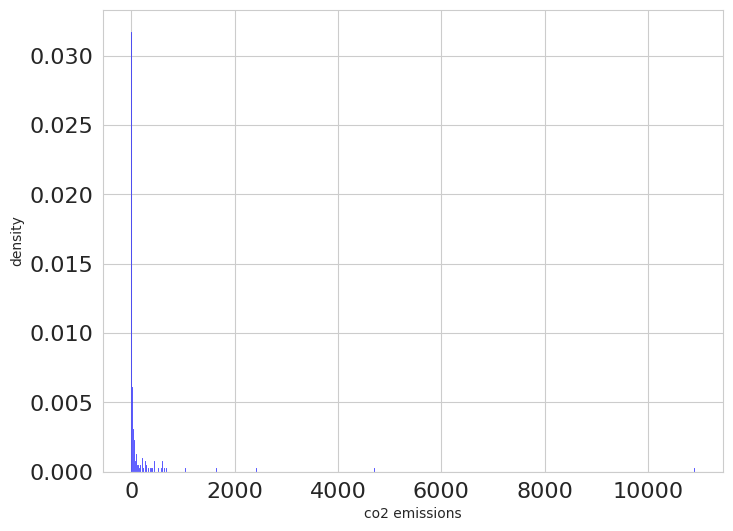

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data=final_df[final_df['year']==2020], x='co2',color='blue',alpha=0.7,stat='density')
plt.ylabel('density')
plt.xlabel('co2 emissions')
plt.tick_params(labelsize=16)

Boxplot of total CO 2  emissions in 2020 with strip plot on top

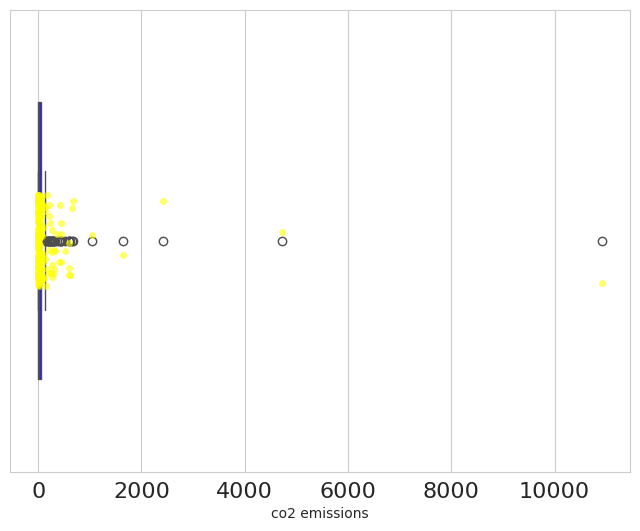

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=final_df[final_df['year']==2020], x='co2',color='blue',width=0.6)
sns.stripplot(data=final_df[final_df['year']==2020], x='co2',color='yellow',size=5,alpha=0.6)
plt.xlabel('co2 emissions')
plt.tick_params(labelsize=16)

## Emission trend over time

In [18]:
final_df.loc[final_df['year']==2020].sort_values(by='co2',ascending=False)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
9121,China,2020,CHN,1.424930e+09,2.415184e+13,858.233,0.602,10914.012,192.970,1.800,...,58.139,12.175,0.060,0.124,0.193,0.009,12295.62,12942.87,-929.881,-8.520
45133,United States,2020,USA,3.359420e+08,1.802736e+13,40.688,0.121,4714.628,-547.517,-10.405,...,8.294,17.514,0.035,0.232,0.278,0.010,5289.13,5505.18,471.929,10.010
19795,India,2020,IND,1.396387e+09,8.945314e+12,122.908,0.088,2421.552,-191.336,-7.323,...,NaN,4.697,0.033,0.035,0.074,0.006,3166.95,3200.82,-173.820,-7.178
35778,Russia,2020,RUS,1.456173e+08,3.606717e+12,20.581,0.141,1632.929,-72.102,-4.229,...,5.536,6.486,0.020,0.079,0.103,0.004,1799.98,2331.48,-268.512,-16.444
21358,Japan,2020,JPN,1.252448e+08,4.626661e+12,24.490,0.196,1039.796,-64.744,-5.862,...,2.387,2.125,0.002,0.031,0.034,0.001,1062.78,1094.56,148.412,14.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34037,Panama Canal Zone,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN
36123,Ryukyu Islands,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN
37353,San Marino,2020,SMR,3.403800e+04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41031,St. Kitts-Nevis-Anguilla,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN


In [19]:
top=final_df.loc[final_df['year']==2020].sort_values(by='co2',ascending=False).head(10)["country"].tolist()

In [20]:
top

['China',
 'United States',
 'India',
 'Russia',
 'Japan',
 'Iran',
 'Germany',
 'Saudi Arabia',
 'Indonesia',
 'South Korea']

##### $\rightarrow$ Below code checks if data set is missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

Filtering final_df datset based on years and top ten emitters

In [21]:
final_df.loc[(final_df['year']>=1971) & (final_df['year']<=2020) & (final_df['country'].isin(top))]['co2'].isnull().sum()

0

After counting total missing values we get 0

##### $\rightarrow$ Time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

<Axes: xlabel='year', ylabel='co2'>

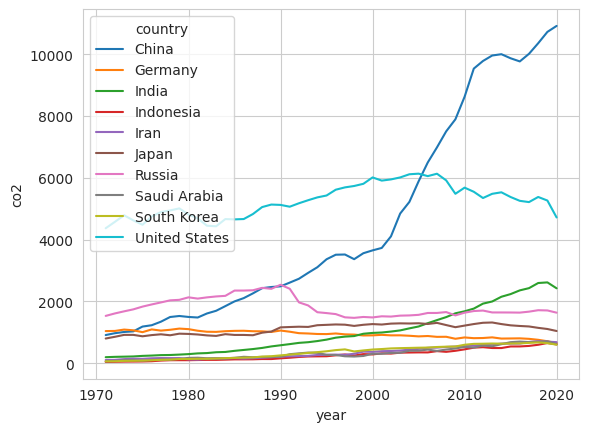

In [22]:
topTenOverYears=final_df.loc[(final_df['year']>=1971) & (final_df['year']<=2020) & (final_df['country'].isin(top))]
import seaborn as sns
sns.lineplot(x=topTenOverYears['year'],y=topTenOverYears['co2'],data=topTenOverYears,hue='country')

We get lineplot showing trends of co2 emission over years 1970 to 2020 for top ten emiters of 2020

##### $\rightarrow$ Below is a time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also includes a plot of the mean total CO$_2$ emissions over all countries on the same plot.

<Axes: xlabel='year', ylabel='co2'>

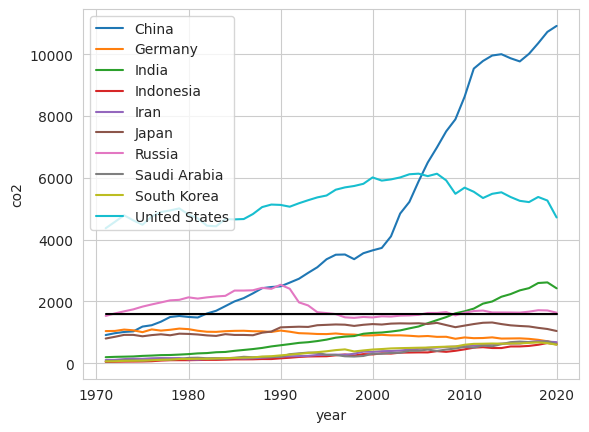

In [23]:
sns.lineplot(x=topTenOverYears['year'],y=topTenOverYears['co2'],data=topTenOverYears,hue='country')
sns.lineplot(x=topTenOverYears['year'],y=topTenOverYears['co2'].mean(),data=topTenOverYears,color='black')

##### $\rightarrow$ Plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

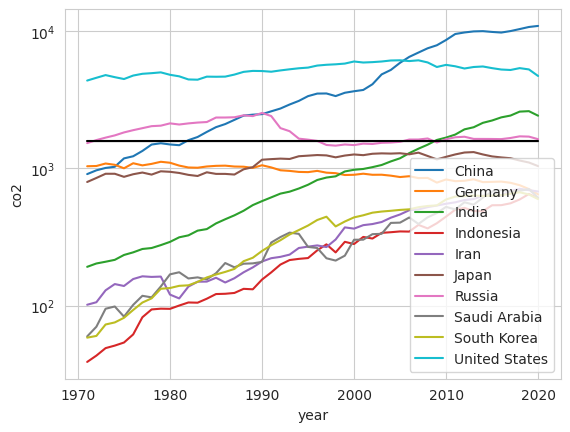

In [24]:
sns.lineplot(x=topTenOverYears['year'],y=topTenOverYears['co2'],data=topTenOverYears,hue='country')
sns.lineplot(x=topTenOverYears['year'],y=topTenOverYears['co2'].mean(),data=topTenOverYears,color='black')
plt.yscale('log')


The co2 emission for
Indonesia,
South Korea,
Saudi Arabia,
Iran,
were low during 1970's ranging between 0-100 kt,but by 2020 the emission increased nearing to 1000 kt
The co2 emission for India during 1970's was about 400 kt and the value went above 1000 kt by 2020
The co2 emission for Japan during 1970's was near to 1000 kt and remained almost constant till 2020
The co2 emission for China during 1970's was near to 1000 kt and went above 10000 by 2020, China being top most emitter of Co2 in 2020
The co2 emission for Germany during 1970's was near to 1000 kt and it slightly declined by 2020
The co2 emission for Russia during 1970's was near to 2000 kt and remained almost constant till 2020
The co2 emission for United States during 1970's was near to 6000 kt and remained almost constant till 2020